Numerical Features Summary:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


C:\Users\Asus\AppData\Local\Temp\ipykernel_2976\1278954274.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


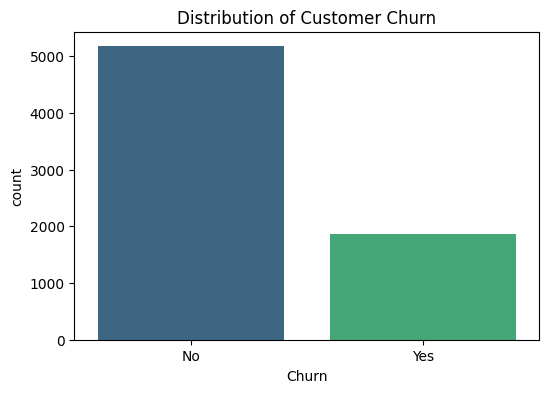

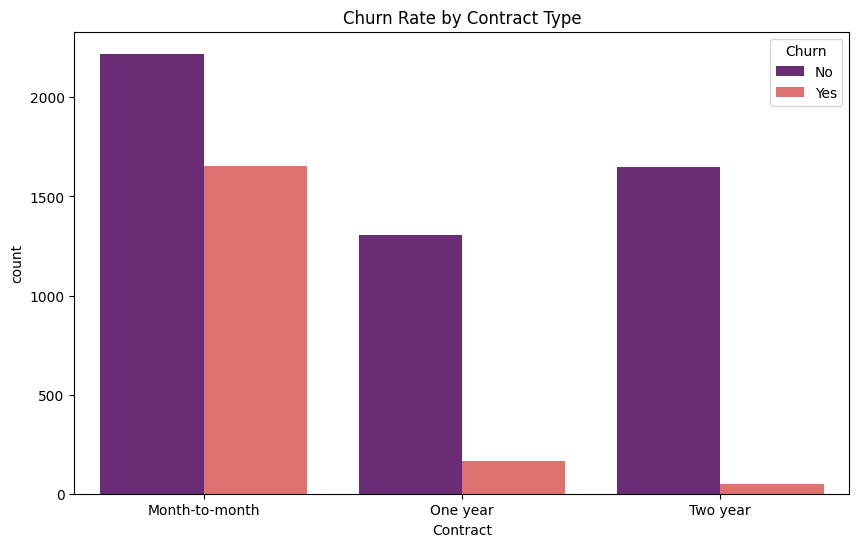

C:\Users\Asus\AppData\Local\Temp\ipykernel_2976\1278954274.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


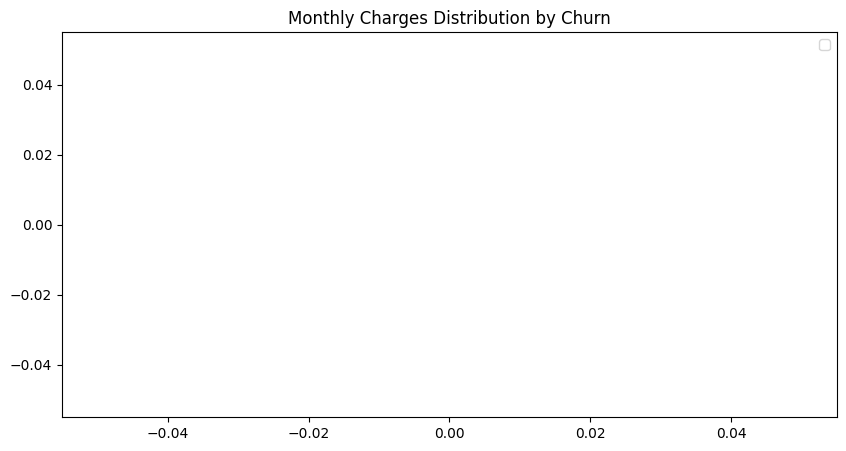


Churn Comparison Metrics:
       MonthlyCharges     tenure
Churn                           
No          61.265124  37.569965
Yes         74.441332  17.979133

Training set size before SMOTE: 5634
Training set size after SMOTE: 8276

Model Performance Report (Balanced Data):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Model saved successfully as 'churn_model_final.pkl'


In [2]:
"""
Telecommunications Customer Churn Prediction Project
Objective: Predict customer churn using Random Forest and handle data imbalance with SMOTE.
Author: [Your Name]
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# --- 1. Data Loading ---
# Loading the Telco Customer Churn dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# --- 2. Data Cleaning ---
# Dropping non-informative columns
df.drop('customerID', axis=1, inplace=True)

# Converting TotalCharges to numeric, handling empty strings as NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Filling missing values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# --- 3. Exploratory Data Analysis (EDA) ---
# Statistical summary of numerical features
print("Numerical Features Summary:")
print(df.describe())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribution of Customer Churn')
plt.show()

# Visualizing Churn based on Contract type (One of the most important features)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='magma')
plt.title('Churn Rate by Contract Type')
plt.show()

# Distribution of Monthly Charges for Churn vs Non-Churn
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Churn'] == 0]['MonthlyCharges'], label='Not Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 1]['MonthlyCharges'], label='Churn', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.legend()
plt.show()

# Average Monthly Charges and Tenure grouped by Churn
comparison = df.groupby('Churn')[['MonthlyCharges', 'tenure']].mean()
print("\nChurn Comparison Metrics:")
print(comparison)

# --- 4. Feature Engineering & Preprocessing ---
# Encoding target variable: Yes -> 1, No -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Converting categorical variables into dummy/indicator variables (One-Hot Encoding)
df_processed = pd.get_dummies(df)

# Splitting features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Handling Data Imbalance (SMOTE) ---
# Initializing SMOTE to balance the minority class (Churners)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f"\nTraining set size before SMOTE: {len(X_train)}")
print(f"Training set size after SMOTE: {len(X_res)}")

# --- 6. Model Development ---
# Initializing and training the Random Forest Classifier
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_res, y_res)

# --- 7. Evaluation ---
# Making predictions on the test set
y_pred_balanced = model_balanced.predict(X_test)

print("\nModel Performance Report (Balanced Data):")
print(classification_report(y_test, y_pred_balanced))

# --- 8. Model Deployment Preparation ---
# Saving the trained model for future use
joblib.dump(model_balanced, 'churn_model_final.pkl')
print("\nModel saved successfully as 'churn_model_final.pkl'")